In [54]:
!pip install category_encoders
!pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [56]:
df = pd.read_csv('/content/gun-violence-data_01-2013_03-2018.csv')
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

In [58]:
df.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


In [59]:
df.nunique(), df.dtypes

(incident_id                    239677
 date                             1725
 state                              51
 city_or_county                  12898
 address                        198037
 n_killed                           16
 n_injured                          23
 incident_url                   239677
 source_url                     213989
 incident_url_fields_missing         1
 congressional_district             54
 gun_stolen                        349
 gun_type                         2502
 incident_characteristics        18126
 latitude                       101240
 location_description            27595
 longitude                      112347
 n_guns_involved                   106
 notes                          136652
 participant_age                 18951
 participant_age_group             898
 participant_gender                873
 participant_name               113488
 participant_relationship          284
 participant_status               2150
 participant_type        

In [60]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['loss'] = df['n_killed'] + df['n_injured']

In [61]:
df.drop(['incident_id', 'n_killed', 'n_injured', 'incident_url_fields_missing'], axis=1, inplace=True)

In [62]:
df.drop(['date', 'incident_url', 'source_url', 'sources'],axis=1,inplace=True)

In [63]:
df.drop(['notes', 'participant_name', 'city_or_county'], axis=1, inplace=True)

In [64]:
df.drop(['address', 'congressional_district', 'latitude', 'longitude'], axis=1, inplace=True)

In [65]:
df.drop(['state_house_district', 'state_senate_district', 'participant_relationship', 'participant_status', 'gun_stolen', 'gun_type'], axis=1, inplace=True)

In [66]:
# incident_characteristics 열의 값들의 빈도수 계산
ic_counts = df['incident_characteristics'].value_counts()

# 상위 10개 값 추출
top10_ic = list(ic_counts[:10].index)

# 상위 10개 값 이외의 값은 '기타'로 대체
df.loc[~df['incident_characteristics'].isin(top10_ic), 'incident_characteristics'] = 'else'

In [67]:
# participant_type 열에서 인원 수 추출하기
df['participant_count'] = df['participant_type'].apply(lambda x: x.count('|') + 1 if isinstance(x, str) else 0)

# participant_type 열에서 가해자 수 추출하기
df['participant_type_gunman'] = df['participant_type'].apply(lambda x: x.count('Subject-Suspect') if isinstance(x, str) else 0)

# participant_type 열에서 피해자 수 추출하기
df['participant_type_victim'] = df['participant_type'].apply(lambda x: x.count('Victim') if isinstance(x, str) else 0)

# participant_type 열에서 관련자 수 추출하기
df['participant_type_witness'] = df['participant_type'].apply(lambda x: x.count('Witness') if isinstance(x, str) else 0)

# participant_type 열에서 기타 수 추출하기
df['participant_type_other'] = df['participant_type'].apply(lambda x: x.count('Arrestee') + x.count('Suspect') + x.count('Unknown') + x.count('Not Involved') if isinstance(x, str) else 0)

In [68]:
def get_user_mapping(txt):
    if txt == "NA":
        return {}
    mapping = {}
    for d in txt.split("||"):
        try:
            key = d.split("::")[0]
            val = d.split("::")[1]
            if key not in mapping:
                mapping[key] = val
        except:
            pass
    return mapping

df['participant_type'] = df['participant_type'].fillna("NA")
df['participant_type_map'] = df['participant_type'].apply(lambda x : get_user_mapping(x))
df['participant_age'] = df['participant_age'].fillna("NA")
df['participant_age_map'] = df['participant_age'].apply(lambda x : get_user_mapping(x))
df['participant_gender'] = df['participant_gender'].fillna("NA")
df['participant_gender_map'] = df['participant_gender'].apply(lambda x : get_user_mapping(x))


for i, row in df.iterrows():
    suspects = []
    for k,v in row['participant_type_map'].items():
        if "suspect" in v.lower():
            suspects.append(k)
    for suspect in suspects:
        if suspect in row['participant_age_map']:
             df.loc[i, 'suspect_age'] = row['participant_age_map'][suspect]

for i, row in df.iterrows():
    victims = []
    for k,v in row['participant_type_map'].items():
        if "victim" in v.lower():
            victims.append(k)
    for victim in victims:
        if victim in row['participant_age_map']:
            df.loc[i, 'victim_age'] = row['participant_age_map'][victim]

In [69]:
for i, row in df.iterrows():
    suspects = []
    for k,v in row['participant_type_map'].items():
        if "suspect" in v.lower():
            suspects.append(k)
    for suspect in suspects:
        if suspect in row['participant_gender_map']:
             df.loc[i, 'suspect_gender'] = row['participant_gender_map'][suspect]
 
    victims = []
    for k,v in row['participant_type_map'].items():
        if "victim" in v.lower():
            victims.append(k)
    for victim in victims:
        if victim in row['participant_gender_map']:
             df.loc[i, 'victim_gender'] = row['participant_gender_map'][victim] 

In [70]:
df.head()

,state,incident_characteristics,location_description,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_type,year,loss,...,participant_type_victim,participant_type_witness,participant_type_other,participant_type_map,participant_age_map,participant_gender_map,suspect_age,victim_age,suspect_gender,victim_gender
0,Pennsylvania,else,NaN,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,4,...,4,0,1,"{'0': 'Victim', '1': 'Victim', '2': 'Victim', ...",{'0': '20'},"{'0': 'Male', '1': 'Male', '3': 'Male', '4': '...",NaN,20,Female,Male
1,California,else,NaN,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,4,...,4,0,1,"{'0': 'Victim', '1': 'Victim', '2': 'Victim', ...",{'0': '20'},{'0': 'Male'},NaN,20,NaN,Male
2,Ohio,else,Cotton Club,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Subject-Suspect||1::Subject-Suspect||2::Vic...,2013,4,...,3,0,2,"{'0': 'Subject-Suspect', '1': 'Subject-Suspect...","{'0': '25', '1': '31', '2': '33', '3': '34', '...","{'0': 'Male', '1': 'Male', '2': 'Male', '3': '...",31,33,Male,Male
3,Colorado,else,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,4,...,3,0,1,"{'0': 'Victim', '1': 'Victim', '2': 'Victim', ...","{'0': '29', '1': '33', '2': '56', '3': '33'}","{'0': 'Female', '1': 'Male', '2': 'Male', '3':...",33,56,Male,Male
4,North Carolina,else,NaN,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,4,...,3,0,1,"{'0': 'Victim', '1': 'Victim', '2': 'Victim', ...","{'0': '18', '1': '46', '2': '14', '3': '47'}","{'0': 'Female', '1': 'Male', '2': 'Male', '3':...",47,14,Female,Male


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   state                     239677 non-null  object 
 1   incident_characteristics  239677 non-null  object 
 2   location_description      42089 non-null   object 
 3   n_guns_involved           140226 non-null  float64
 4   participant_age           239677 non-null  object 
 5   participant_age_group     197558 non-null  object 
 6   participant_gender        239677 non-null  object 
 7   participant_type          239677 non-null  object 
 8   year                      239677 non-null  int64  
 9   loss                      239677 non-null  int64  
 10  participant_count         239677 non-null  int64  
 11  participant_type_gunman   239677 non-null  int64  
 12  participant_type_victim   239677 non-null  int64  
 13  participant_type_witness  239677 non-null  i

In [72]:
df.drop(['participant_age', 'participant_gender', 'participant_type', 'participant_type_map', 'participant_age_map', 'participant_gender_map'],axis=1,inplace=True)

In [73]:
df.drop(['participant_age_group', 'location_description'],axis=1,inplace=True)

In [74]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [75]:
df.dtypes

state                        object
incident_characteristics     object
n_guns_involved             float64
year                          int64
loss                          int64
participant_count             int64
participant_type_gunman       int64
participant_type_victim       int64
participant_type_witness      int64
participant_type_other        int64
suspect_age                  object
victim_age                   object
suspect_gender               object
victim_gender                object
dtype: object

In [76]:
df['suspect_age'] = df.suspect_age.astype(int)
df['victim_age'] = df.victim_age.astype(int)
df['year'] = df.year.astype(str)

In [77]:
from sklearn.model_selection import train_test_split
X = df.drop('loss', axis=1)
y = df['loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
from sklearn.preprocessing import StandardScaler
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = StandardScaler()

X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

In [79]:
from category_encoders import OneHotEncoder

ohe = OneHotEncoder()

X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

In [83]:
X_train_ohe.shape

(13504, 77)

In [88]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error

baseline = [y_train.mean()] * len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)

print('기준모델 r2:',baseline_r2, '\n기준모델 mae:', baseline_mae.round(2))

기준모델 r2: 0.0 
기준모델 mae: 0.63


In [82]:
from sklearn.model_selection import cross_val_score

# 모델 성능 예측
model = LinearRegression()
cv_score = cross_val_score(model, X_train_ohe, y_train, cv=5)

# 성능 확인
print(cv_score)
print('평균:', cv_score.mean())

[-4.69601910e+20  7.45654679e-01  8.25033939e-01  7.07898660e-01
  9.59795282e-01]
평균: -9.392038201902191e+19


In [90]:
model.fit(X_train_ohe, y_train)

print('테스트 r2:', np.round(model.score(X_test_ohe, y_test),3), '\n테스트 mae:', np.round(mean_absolute_error(y_test, model.predict(X_test_ohe)), 3))

테스트 r2: 0.771 
테스트 mae: 0.251


In [92]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_r2 = np.round(model.score(X_train, y_train) , 3)
    test_r2 = np.round(model.score(X_test, y_test),3)
    train_mae = np.round(mean_absolute_error(y_train, model.predict(X_train)), 3)
    test_mae = np.round(mean_absolute_error(y_test, model.predict(X_test)), 3)
    print(f'학습 세트 r2_score : {train_r2}')
    print(f'테스트 세트 r2_score : {test_r2}\n')

    print(f'학습 세트 mae_score : {train_mae}')
    print(f'테스트 세트 mae_score : {test_mae}')

    return train_r2, test_r2, train_mae, test_mae

In [91]:
from sklearn.linear_model import RidgeCV

# ridgecv로 학습
alphas = np.arange(1, 100, 10)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_ohe, y_train)

print("alpha: ", ridge.alpha_)

alpha:  11


Ridge Regression, alpha = 11
학습 세트 r2_score : 0.886
테스트 세트 r2_score : 0.771

학습 세트 mae_score : 0.255
테스트 세트 mae_score : 0.25
기준모델 r2: 0.0 
기준모델 mae: 0.63


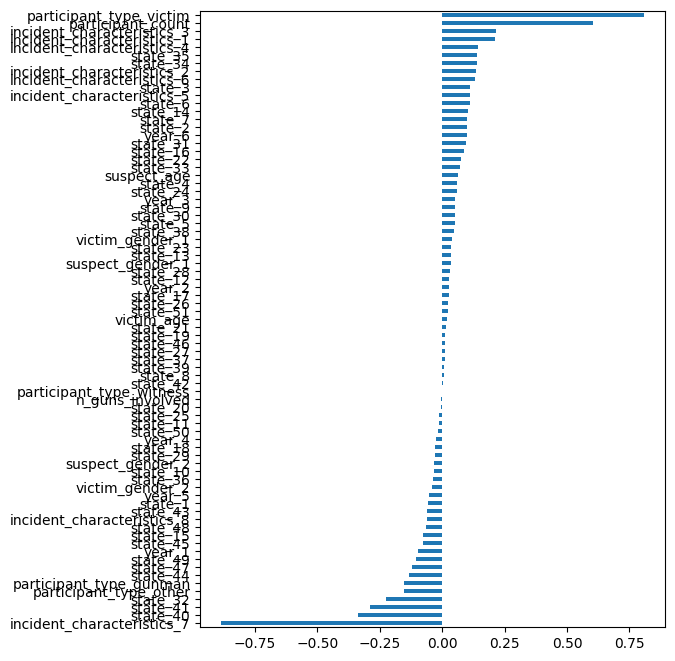

In [102]:
print('Ridge Regression, alpha = 11')

ridge = Ridge(alpha = 11)
ridge.fit(X_train_ohe, y_train)

print_score(ridge, X_train_ohe, y_train, X_test_ohe, y_test)
print('기준모델 r2:',baseline_r2, '\n기준모델 mae:', baseline_mae.round(2))
coefficients = pd.Series(ridge.coef_, X_train_ohe.columns)
idx = np.abs(coefficients).index
plt.figure(figsize = (6, 8))
coefficients[idx].sort_values().plot.barh()
plt.show()

- 사회 안전에 관심을 두고, 범죄자 관련 데이터를 기반으로 피해를 예측할 수 있는 모델을 만들고자 하였다. 하지만 범죄자를 기반으로 하는 데이터는 법적으로 문제가 되어 얻을 수 없었고, 범죄 관련 통계자료만 얻을 수 있었다. 그 중 데이터 셋의 크기 및 특성을 고려하였을 때 가장 적합한 데이터가 kaggle의 gun-violence-data_01-2013_03-2018.csv 데이터였다.  
  

- 총기 폭력은 정치적으로도 민감한 문제였기 때문에 데이터에는 범죄 관련 특성과 정치 구역구 관련 특성이 혼재해있었다. 이 중 범죄 관련 특성 중 의미가 있는 것으로 보이는 특성들만 선택하고, 피해자, 목격자 그리고 범죄자를 구분하고, Cardinality를 낮추는 Feature Engineering을 수행하였다.
  
- 결과적으로 예측에 사용한 Feature는 
       'state', 'incident_characteristics', 'n_guns_involved', 'year',
       'participant_count', 'participant_type_gunman',
       'participant_type_victim', 'participant_type_witness',
       'participant_type_other', 'suspect_age', 'victim_age', 'suspect_gender',
       'victim_gender'
로 사건 발생 주, 사건의 성격, 그리고 데이터에서 찾을 수 있었던 범죄자와 피해자의 특성이다.  
타겟은 사상자를 나타내는 **loss**로 정하였다.
  
- 각 수치형 변수들의 회귀계수의 영향력을 동일하게 만들기 위해 수치형 변수들은 정규표준화 시켜주었고, 범주형 데이터들은 *OneHotEncoding* 과정을 거쳤다. 그 후 **loss**의 평균을 기준 모델로 삼고, *Cross Validation* 을 해본 후 학습 및 테스트를 진행하였다. 그 후 과적합 방지를 위해 *Ridge CV*를 이용해 분산을 조정하였다. 그 후 Feature Importance를 확인하였다.

- 가장 적합한 데이터를 찾는데 실패하였고, 다른 데이터를 찾는 과정에서 Big query 파일을 사용할 수 있을 것이라 착각하였다. 문제를 알아차리는데 오랜 시간이 소요되었고, 결과적으로 원하던 데이터를 찾지 못하였다.

- 결과 또한 적합한 Feature가 부족하고 data leakage가 존재하여, 선택한 특성이 설명력을 가지진 못하였다. 굳이 ML 과정이 없다고 하더라도 더 많은 insight를 찾을 수 있을 것이다.